In [1]:
import numpy as np
import pandas as pd

data_x_test = np.load('x_test.npy')
data_x_train = np.load('x_train.npy')
data_y_train = np.load('y_train.npy')

x_train_df = pd.DataFrame(data_x_train)
y_train_df = np.log(pd.Series(data_y_train))
x_test_df = pd.DataFrame(data_x_test)

In [2]:
y_train_df.head()

0    13.361380
1    13.031782
2    12.363076
3    12.936034
4    13.222209
dtype: float64

In [3]:
x_train_df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999


In [4]:
categorial_features = ['month',
                       'waterfront',
                       'floors',
                       'zipcode']

numeric_features = ['bedrooms',
                    'bathrooms',
                    'sqft_living',
                    'sqft_lot',
                    'condition',
                    'grade',
                    'sqft_above',
                    'sqft_basement',
                    'yr_renovated',
                    'yr_built',
                    'lat',
                    'long',
                    'x', 'y', 'z',
                   ]

In [5]:
x_train_df['date'].head()

0    2014-09-16
1    2014-11-18
2    2014-11-10
3    2015-04-16
4    2014-07-23
Name: date, dtype: object

In [6]:
date_base_train = x_train_df['date'].tolist()
date_base_test = x_test_df['date'].tolist()

In [7]:
date_base_train = x_train_df['date'].tolist()
date_base_test = x_test_df['date'].tolist()

month_train = []

month_test = []

for i in date_base_train:
    month_train.append(i[5:7])

for j in date_base_test:
    month_test.append(j[5:7])
    
x_train_df['month'] = month_train

x_test_df['month'] = month_test

x_test_df = x_test_df.drop(['date'], axis=1)
x_train_df = x_train_df.drop(['date'], axis=1)

In [7]:
months_1 = pd.get_dummies(x_train_df['month'])
months_2 = pd.get_dummies(x_test_df['month'])

In [8]:
x_train_df = pd.concat([x_train_df, months_1], axis=1)
x_test_df = pd.concat([x_test_df, months_2], axis=1)

In [9]:
x_train_df = x_train_df.drop(['month'], axis=1)
x_test_df = x_test_df.drop(['month'], axis=1)

In [10]:
zip_codes_train = pd.get_dummies(x_train_df['zipcode'])
zip_codes_test = pd.get_dummies(x_test_df['zipcode'])

In [11]:
x_train_df = pd.concat([x_train_df, zip_codes_train], axis=1)
x_test_df = pd.concat([x_test_df, zip_codes_test], axis=1)

In [12]:
x_train_df = x_train_df.drop(['zipcode'], axis=1)
x_test_df = x_test_df.drop(['zipcode'], axis=1)

In [8]:
#x_test_df['square'] = x_test_df.sqft_living**2
#x_train_df['square'] = x_train_df.sqft_living**2

x_test_df['x'] = np.cos(x_test_df['lat']) * np.cos(x_test_df['long'])
x_test_df['y'] = np.cos(x_test_df['lat']) * np.sin(x_test_df['long'])
x_test_df['z'] = np.sin(x_test_df['lat'])

x_train_df['x'] = np.cos(x_train_df['lat']) * np.cos(x_train_df['long'])
x_train_df['y'] = np.cos(x_train_df['lat']) * np.sin(x_train_df['long'])
x_train_df['z'] = np.sin(x_train_df['lat'])

#x_test_df['new_1'] = np.cos(x_test_df['lat']) * np.cos(x_test_df['long'])
#x_train_df['new_1'] = np.cos(x_train_df['lat']) * np.cos(x_train_df['long'])

#x_test_df['new_2'] = np.cos(x_test_df['lat']) * np.sin(x_test_df['long'])
#x_train_df['new_2'] = np.cos(x_train_df['lat']) * np.sin(x_train_df['long'])

#x_test_df['new_3'] = np.sin(x_train_df['lat'])
#x_train_df['new_3'] = np.sin(x_train_df['lat'])

In [9]:
x_test_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,month,x,y,z
0,3.0,2.0,1600,7350,1.0,False,4,7,1600,0,1979,0,98052,47.697701,-122.125999,09,0.774808,0.324040,-0.542836
1,4.0,3.0,3060,50002,1.0,False,4,8,2460,600,1957,0,98008,47.620499,-122.096001,11,0.800584,0.363405,-0.476447
2,5.0,2.5,3490,18850,1.0,False,4,9,1840,1650,1958,0,98005,47.595501,-122.176003,10,0.838010,0.302209,-0.454322
3,3.0,2.5,2360,9005,1.0,False,5,7,1340,1020,1929,0,98133,47.707600,-122.336998,11,0.820168,0.153584,-0.551123
4,4.0,3.0,2860,10292,1.0,False,4,8,2860,0,1953,1999,98004,47.628601,-122.206001,12,0.831943,0.272112,-0.483555


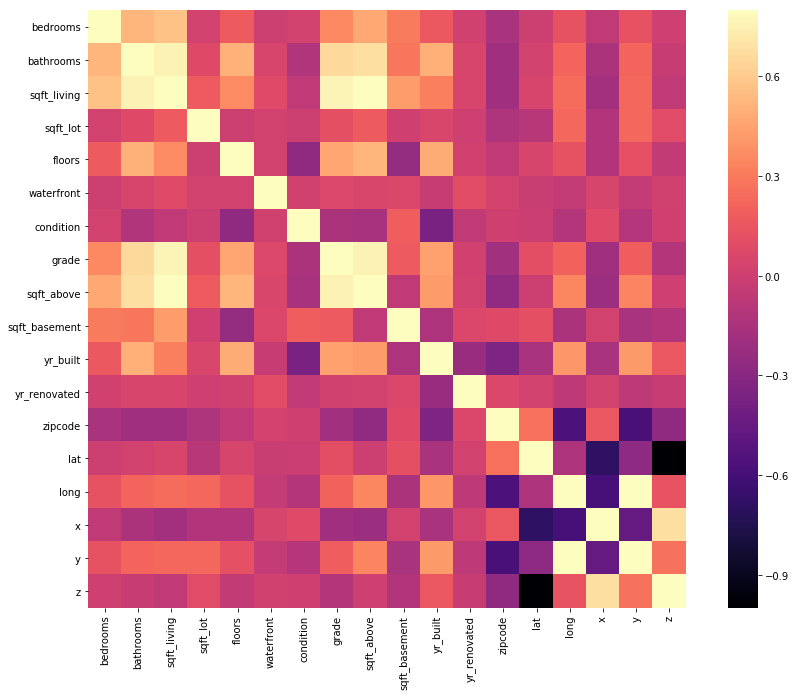

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = x_train_df.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, train_size=0.7, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
def mape_scorer(estimator, X_test, y_test):
    return -mape(np.exp(y_test), np.exp(estimator.predict(X_test)))

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

scals = [StandardScaler(), MinMaxScaler()]

param_grid = {
#    'poly__degree': [2],
    'reg__alpha' : np.logspace(-3, -1, 3),
 #   'reg' : [Lasso(max_iter=2500), Ridge()],
}

#pipeline = Pipeline([
#    ('scale', MinMaxScaler()),
#    ('poly', PolynomialFeatures()),
#    ('reg', LinearRegression())
#])

pipeline = Pipeline(
            [('encoding', ColumnTransformer([('one_hot_encode',
                                              OneHotEncoder(sparse=False, handle_unknown='ignore', categories='auto'),
                                              categorial_features),
                                            ('scaler', StandardScaler(), numeric_features),
                                            ('polynom', PolynomialFeatures(degree=2), numeric_features)],
                                            sparse_threshold=0,
                                            remainder='passthrough')),
             ('reg', Ridge())])

cv = GridSearchCV(pipeline, param_grid=param_grid, refit=True,
                         cv=5, return_train_score=True, verbose=1,
                         scoring=mape_scorer)
cv.fit(x_train, y_train)
#test_cv = cv.predict(x_test_df)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('encoding', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0,
         transformer_weights=None,
         transformers=[('one_hot_encode', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
    ...it_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'reg__alpha': array([0.001  , 0.00167, 0.00278, 0.00464, 0.00774, 0.01292, 0.02154,
       0.03594, 0.05995, 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function mape_scorer at 0x116bc7d90>, verbose=1)

In [16]:
cv.best_estimator_

Pipeline(memory=None,
     steps=[('encoding', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0,
         transformer_weights=None,
         transformers=[('one_hot_encode', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
    ...intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001))])

In [17]:
#x_train_df.isnull().any()

In [18]:
#cv.score(x_train_df)
#x_test_df.loc[[1086]]
#x_test_df[1085:1089]

In [19]:
best_est = cv.best_estimator_
#best_est.fit(x_train_df, np.log(y_train_df))
mape(np.exp(y_test), np.exp(best_est.predict(x_test)))

#cv.fit(x_train_df, np.log(y_train_df))
#mape(y_train_df, np.exp(cv.predict(x_train_df)))

13.16170982566805

In [21]:
df_test_y = pd.DataFrame(np.exp(cv.predict(x_test_df)), columns=['Price'])

In [22]:
df_test_y['Id'] = [i for i in range(1, 6614)]
df_test_y = df_test_y.set_index('Id')
#df_test_y

In [23]:
df_test_y.to_csv('y_test.csv')